<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# TAL Labo 1c : Opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [32]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

**1.** S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [33]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response2 = request.urlopen(url2)
html2 = response2.read().decode('utf8')
len(html2)

1033174

Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le code source de la page est stocké dans `html2`, on extrait le texte dans `raw2`.

In [34]:
from bs4 import BeautifulSoup

In [35]:
text2 = BeautifulSoup(html2).get_text()

**2.** Veuillez réutiliser la méthode du _notebook_ 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse (il ne parle pas de la Suisse).  Quelle est la longueur du résultat ?  Veuillez afficher ses 100 premiers et 100 derniers caractères.

In [37]:
start2 = text2.find("officially the Swiss Confederation")
end2 = text2.find("produced in Ticino")
clean_text2 = text2[start2:end2]
len(clean_text2)

90589

**3.** Veuillez effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Veuillez écrire le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [39]:
filename = "sample_web_page.txt"
sentences = sent_tokenize(clean_text2)
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
with open(filename, 'a', encoding='utf8') as fd:
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        fd.write(" ".join(tokens) + "\n" + "\n")

> Quelques imperfections peuvent être observées. Par exemple, les numéros de références wikipédia entre crochets (comme [37], [36]) sont traités comme des tokens séparés, ce qui pourrait être problématique si l'on souhaite un texte plus fluide ou lisible. Ils tendent à enlever du sens plus qu'autre chose à la phrase, et mériteraient d'être éliminés.

> De plus, la ponctuation est également tokenisée, à la manière de l'étape b, ce qui peut être gênant si l'on souhaite analyser uniquement le contenu textuel sans les virgules, points ou même les parenthèses.

> Au final, le processus de segmentation et de tokenisation est globalement correct, mais il pourrait être amélioré.

**4.** Veuillez maintenant effectuer la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [41]:
words2 = word_tokenize(clean_text2)
len(words2)

17179

**5.** Veuillez créer un objet de type `nltk.Text` à partir de la liste de *tokens* `words2`.
* Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant cet objet en un `set`.  
* Combien de mots différents y a-t-il dans le vocabulaire, incluant les ponctuations et tout autre symbole ? 
* Quels sont les 20 types les plus longs ? Que pensez-vous du résultat trouvé ?

In [42]:
text2 = nltk.Text(words2)
vocab2 = set(text2)
len(vocab2)
longest_words2 = sorted(vocab2, key=len, reverse=True)[:20]
longest_words2

['Donau-Iller-Rhine-Limes',
 '65,000-kilometre-long',
 'machines/electronics',
 'Switzerland–European',
 'policies—contributes',
 '57.1-kilometre-long',
 'non-German-speaking',
 'instruments/watches',
 'commander-in-chief',
 'multi-disciplinary',
 'autobahn/autoroute',
 'near-Mediterranean',
 'Weiterentwicklung',
 'Telecommunication',
 'Non-Proliferation',
 'pre-revolutionary',
 'Gallen-Altenrhein',
 'authoritarianism',
 'energy-producing',
 'SwitzerlandSwiss']

> Le résultat des 20 types les plus longs montre une série de termes composés liés à des descriptions géographiques ou politiques, tels que "Donau-Iller-Rhine-Limes" ou "65,000-kilometre-long". Ces termes sont des connexions entre différents mots, parfois avec des tirets, pour donner des informations détaillées, ce qui peut expliquer leur longueur. Certains termes, comme "SwitzerlandSwiss" ou "Switzerland–European", semblent être des répétitions ou des expressions liées à la Suisse, probablement issues de l'expression du contexte géopolitique ou économique. Ce type de résultat indique que les phrases sont parfois complexes et comprennent des informations spécialisées qui ne sont pas forcément représentatives d'un vocabulaire quotidien.

**6.** Veuillez construire un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [19]:
from nltk.probability import FreqDist

In [20]:
words2 = [word.lower() for word in words2 if word.isalpha()]
freqdist2 = FreqDist(words2)
most_common2 = freqdist2.most_common(30)
most_common2

[('the', 1155),
 ('of', 561),
 ('and', 470),
 ('in', 467),
 ('to', 238),
 ('switzerland', 229),
 ('swiss', 189),
 ('a', 178),
 ('is', 151),
 ('as', 103),
 ('federal', 102),
 ('by', 92),
 ('for', 91),
 ('are', 87),
 ('was', 85),
 ('with', 78),
 ('from', 71),
 ('it', 61),
 ('world', 52),
 ('at', 49),
 ('has', 47),
 ('on', 46),
 ('most', 44),
 ('its', 44),
 ('main', 41),
 ('other', 41),
 ('one', 41),
 ('an', 41),
 ('cantons', 39),
 ('population', 39)]

**7.** Veuillez afficher le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

In [24]:
import matplotlib.pyplot as plt

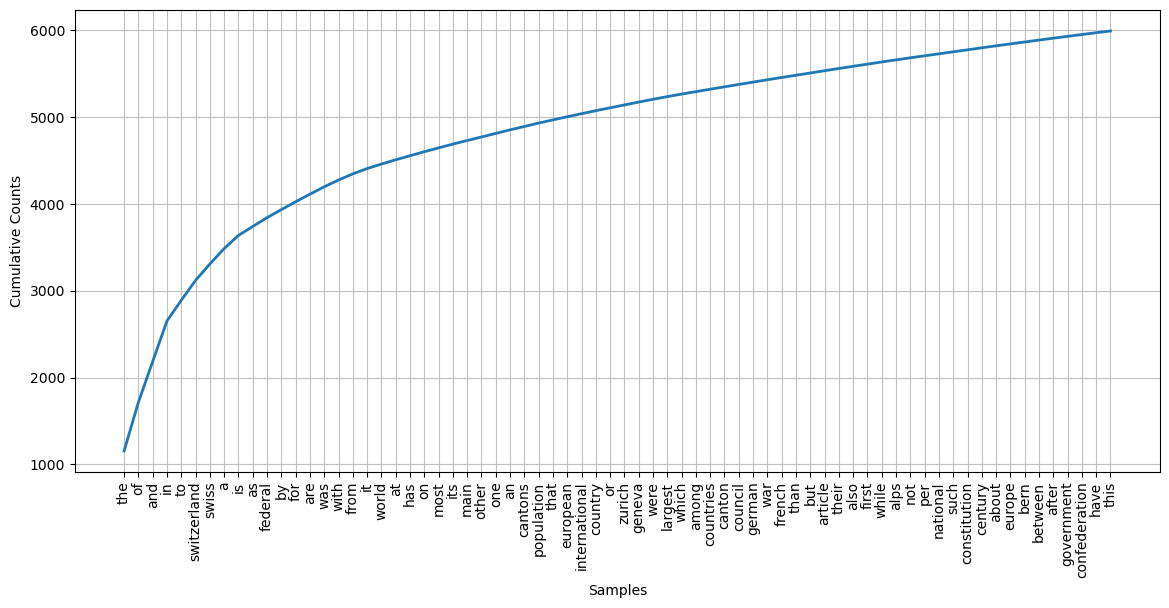

In [ ]:
plt.figure(figsize=(14, 6))
freqdist2.plot(70, cumulative=True)
plt.show()

**8.** Veuillez construire une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

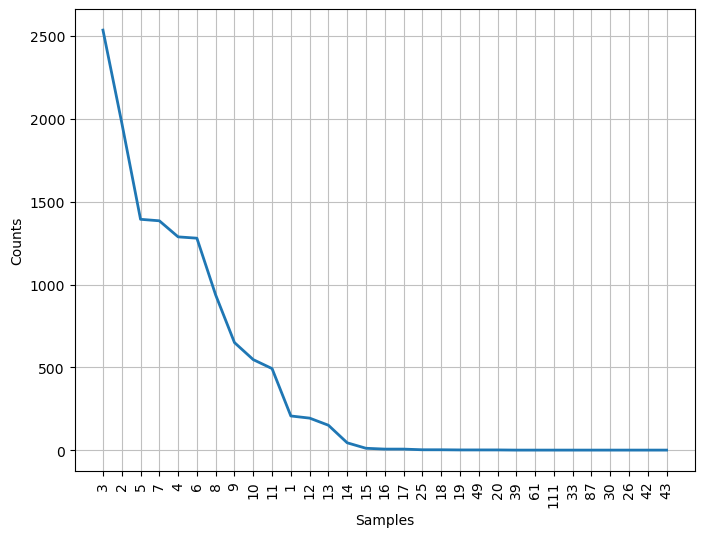

In [30]:
plt.figure(figsize=(8, 6))
lengths = [len(word) for word in words2 if word.isalpha()]
length_freq_dist = FreqDist(lengths)
length_freq_dist.plot(cumulative=False)
plt.show()

> On remarque une forte concentration de mots courts (de 3 à 7 lettres) qui diminuent progressivement jusqu'à des longueurs plus longues. Le fait que le nombre d'occurrences chute après la longueur de 15 indique que la majorité des mots dans le texte sont relativement courts, ce qui est assez normal. Les rares tokens plus longs (plus de 15 caractères) ne semblent pas fréquents, ce qui reflète aussi la structure générale du texte. Cela suggère que la page contient une majorité de mots courants (des noms communs, des articles, ou des prépositions), avec moins de termes très longs, ce qui est logique dans des textes non techniques. C'est une distribution typique de textes où la longueur des mots suit une loi de probabilité plus concentrée autour des tailles les plus courantes.

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_ sous le nom `TAL_labo1c_NOM1_NOM2.ipynb`.  Ajoutez-le dans une archive _zip_ avec le _notebook_ 1b, et soumettez l'archive individuellement sur Cyberlearn. 